In [97]:
import pandas as pd
from datetime import datetime, timedelta

# Read data from the CSV file

In [98]:
df = pd.read_csv("race_results.csv", 
                 parse_dates=["date"], 
                 date_format="%d/%m/%Y")

In [99]:
df

,name,distance,date,city,country,duration
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0:29:19
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0:27:10
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0:25:36


# Add columns with durations converted into timedelta and seconds

In [100]:
def from_str_to_timedelta(row):
    duration = datetime.strptime(row["duration"], "%H:%M:%S")
    duration = timedelta(hours=duration.hour, 
                         minutes=duration.minute, 
                         seconds=duration.second)
    return duration

df["duration_timedelta"] = df.apply(from_str_to_timedelta, axis=1)

In [104]:
def from_str_to_sec(row):
    duration = datetime.strptime(row["duration"], "%H:%M:%S")
    duration = timedelta(hours=duration.hour, 
                         minutes=duration.minute, 
                         seconds=duration.second).total_seconds()
    return duration

df["duration_sec"] = df.apply(from_str_to_sec, axis=1)

In [105]:
df

,name,distance,date,city,country,duration,duration_timedelta,duration_sec
0,Cursa Moritz Sant Antoni,5,2025-01-26,Barcelona,Spain,0:29:19,0 days 00:29:19,1759.0
1,XIII Cursa Benefica Malalties Minoritaries,5,2025-02-23,Badalona,Spain,0:27:10,0 days 00:27:10,1630.0
2,Cursa de la Dona Pienda,5,2025-03-23,Pineda de Mar,Spain,0:25:36,0 days 00:25:36,1536.0


# Plotting - Solution 2

In [138]:
durations = df["duration_sec"].tolist()
durations

[1759.0, 1630.0, 1536.0]

In [132]:
delta_sec = 20
minlim = int(min(durations) - delta_sec)
maxlim = int(max(durations) + delta_sec)
durations_ticks = range(minlim, maxlim, delta_sec)

In [133]:
durations_labels = []
timeZero = datetime(2025,1,1)
for duration in durations_ticks:
    durations_labels.append((timeZero + timedelta(seconds=duration)).strftime("%H:%M:%S"))
durations_labels

['00:25:16',
 '00:25:36',
 '00:25:56',
 '00:26:16',
 '00:26:36',
 '00:26:56',
 '00:27:16',
 '00:27:36',
 '00:27:56',
 '00:28:16',
 '00:28:36',
 '00:28:56',
 '00:29:16',
 '00:29:36']

In [134]:
dates = df["date"].tolist()
dates = [date.strftime("%Y-%m-%d") for date in dates]
dates

['2025-01-26', '2025-02-23', '2025-03-23']

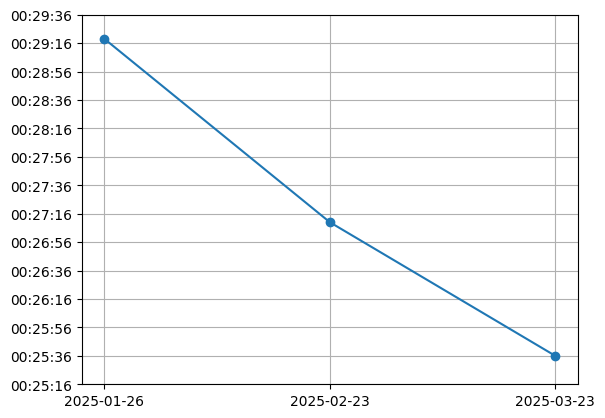

In [139]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(dates, durations, marker='o')
ax.set_yticks(durations_ticks, durations_labels)

ax.grid()
plt.show()

# Plotting - Solution 1

In [62]:
dates = df["date"].tolist()
dates = [date.strftime("%Y-%m-%d") for date in dates]
durations = df["duration_timedelta"].tolist()

In [63]:
dates

['2025-01-26', '2025-02-23', '2025-03-23']

In [76]:
import matplotlib.dates as mdates

zero = datetime(2025,1,1)
time = [zero + t for t in durations]
zero = mdates.date2num(zero)
time = [t-zero for t in mdates.date2num(time)]
time

[np.float64(0.02035879629693227),
 np.float64(0.018865740741603076),
 np.float64(0.01777777777897427)]

In [85]:
division = mdates.date2num(datetime(2025,1,1) + timedelta(seconds=10)) - zero
division

np.float64(0.00011574074233067222)

In [94]:
range_yticks = np.arange(min(time) - division, max(time) + division, division)
range_yticks

array([0.01766204, 0.01777778, 0.01789352, 0.01800926, 0.018125  ,
       0.01824074, 0.01835648, 0.01847222, 0.01858796, 0.0187037 ,
       0.01881944, 0.01893519, 0.01905093, 0.01916667, 0.01928241,
       0.01939815, 0.01951389, 0.01962963, 0.01974537, 0.01986111,
       0.01997685, 0.02009259, 0.02020833, 0.02032407, 0.02043981])

AttributeError: 'numpy.ndarray' object has no attribute 'tostring'

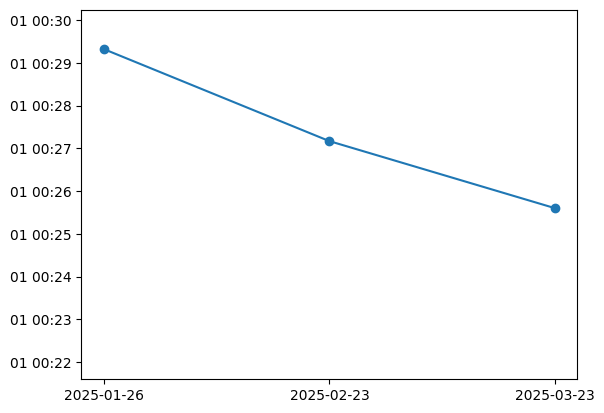

In [96]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(dates, time, marker='o')
ax.set_ylim(0.015, 0.021)
ax.yaxis_date()
ax.set_yticks(range_yticks, range_yticks.tostring())
ax.yaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))
ax.set_xticks(dates, dates, rotation=45)

ax.grid()
plt.show()